<br><br><br><br>
<center>Semestralni zadatak  <br>
<font size=5pt weight="bold">Integracija funkcija - Deo 1. Jupyter Notebook</font>
<br><br>
Praktikum iz računarskih alata u matematici 
<br>


<div>
    Uroš Nedeljković 2022/0058 $\;$ i $\;$
    Mateja Bogdanović 2022/0511 
</div>

<center/>2024/25.
</center>
<br><br><br><br>

# 1. Neodređeni integrali
---
## 1.1 Matematička osnova

Neka je funkcija $f$ definisana na intervalu $(a, b)$. Ako postoji funkcija $F$ takva da važi $F'(x)=f(x), \; \forall x \in (a, b)$, onda kažemo da je $F$ <b>primitivna funkcija</b> funkcije $f$ na intervalu $(a, b)$.

Skup svih primitivnih funkcija funkcije $f(x)$ zovemo <b>neodređenim integralom</b> funkcije $f(x)$ i označavamo sa  $\int{f(x)}\,dx$. <br>
Ako je $F(x)$ jedna primitivna funkcija funkcije $f(x)$ na intervalu $(a, b)$, onda skup $\int{f(x)}\,dx$ za $x \in (a, b)$ pišemo kao:


\begin{equation}
\int{f(x)}\,dx = F(x) + C, \quad C \in \mathbb{R}, \; x \in (a, b)
\end{equation}


---
## 1.2 Rešavanje zadataka

Za rešavanje neodređenih integrala koristićemo SymPy biblioteku za simboličko izračunavanje. Za iscrtavanje grafika se može koristiti Matplotlib i NumPy ili SimPy.

In [1054]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing() # lep ispis

---
<h4>Zadatak 1. - Jednostavan integral</h4>
Naći rešenje integrala:
$$
\int{x^2}\,dx
\tag{1}
$$


U SymPy prvo moramo definisati simbole koji će konfigurisati u podintegralnoj funkciji. U ovom slučaju, to je samo $x$.

In [1057]:
x = sym.Symbol("x")

Onda definišemo podintegralnu funkciju $f$.

In [1059]:
f = x**2 # x^2
f

Konačno, koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili $F(x)$.

In [1061]:
F = f.integrate()
F

Tako nalazimo da je rešenje integrala $(1)$.

$$
\int{x^2}\,dx = \frac{x^3}{3} + C
$$

Rešenje možemo skicirati pomoću SymPy:

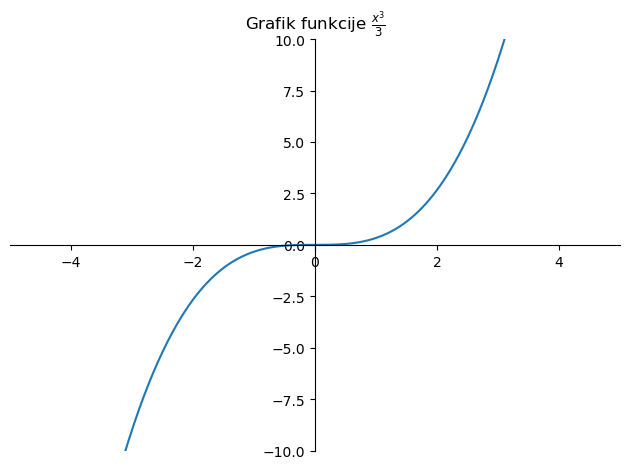

In [1065]:
sym.plot(F, xlim=(-5, 5), ylim=(-10, 10), xlabel="", ylabel="", title = r"Grafik funkcije $\frac{x^3}{3}$")
# r " ... " da bi se prepoznao Latex (raw string)

---
<h4>Zadatak 2. - Integral iracionalne funkcije</h4>
$$
\int{\frac{-x}{\sqrt{1-x^2}}}\,dx
\tag{2}
$$

Rešićemo integral kao do sada i skiciraćemo grafik koji se dobije pomoću Matplotlib biblioteke.

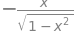

In [1087]:
x, y = sym.symbols("x y")
f = -x/(sym.sqrt(1-x**2))
f

In [1088]:
F = f.integrate(x)
F

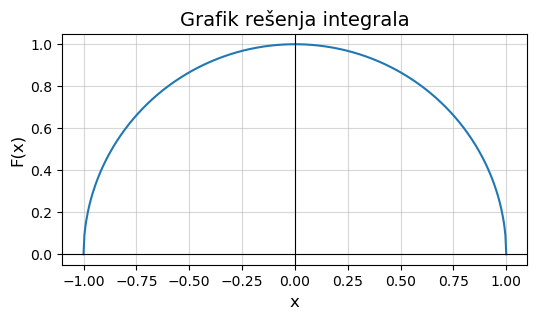

In [1089]:
from matplotlib import style as plt_style
def skiciraj(fja, x, n, naslov, x_naslov, y_naslov, x_dimenzije, y_dimenzije):
    x_vals = np.linspace(-1, 1, n) # niz od n ekvidistantnih tačaka na intervalu
    f_lambdified = sym.lambdify(x, fja, 'numpy') # pretvaramo u Python izraz
    y_vals = f_lambdified(x_vals) # dobijamo y vrednosti funkcije f

    # kreiramo grafik
    plt.figure(figsize=(x_dimenzije, y_dimenzije)) # dimenzije grafika u kvadratićima
    plt.plot(x_vals, y_vals)

    # dodavanje naslova i oznaka
    plt.title(naslov, fontsize=14)
    plt.xlabel(x_naslov, fontsize=12)
    plt.ylabel(y_naslov, fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='-') # x osa
    plt.axvline(0, color='black', linewidth=0.8, linestyle='-') # y osa
    plt.grid(alpha=0.5) # prikaz pozadine na kvadratiće i njihova prozirnost

    plt.show()
skiciraj(F, x, 500, 'Grafik rešenja integrala', 'x', 'F(x)', 6, 3)

---
<h4>Zadatak 3. - Integral sa parametrom</h4>
$$
\int{x^a\ln{x}}\,dx
\tag{3}
$$

Integral se rešava standardno:

In [1092]:
a, x = sym.symbols("a x")
f = x**a*sym.ln(x)
f

In [1093]:
F = f.integrate(x)
F

⎧     a             a                  a                
⎪a⋅x⋅x ⋅log(x)   x⋅x ⋅log(x)        x⋅x                 
⎪───────────── + ──────────── - ────────────  for a ≠ -1
⎪ 2               2              2                      
⎪a  + 2⋅a + 1    a  + 2⋅a + 1   a  + 2⋅a + 1            
⎨                                                       
⎪                     2                                 
⎪                  log (x)                              
⎪                  ───────                    otherwise 
⎪                     2                                 
⎩                                                       

# 2.Određeni Integrali
---
## 2.1 Matematička osnova

Neka je $[a,b] \subseteq \mathbb{R}$ neki interval. Podelimo taj interval pomoću tačaka  $ a = x_0 < x_1 < x_2 < \ldots < x_n = b, $
a zatim u svakom od podintervala $[x_i, x_{i+1}]$, $i=0, \ldots, n-1$, izaberimo po jednu tačku i označimo je sa $\xi_i$.  

Tačke $x_i$ i $\xi_i$ definišu podelu intervala $[a,b]$, u oznaci:
$ d = (x_0, x_1, \ldots, x_n; \xi_0, \xi_1, \ldots, \xi_{n-1}).$

Neka je data funkcija $f: [a,b] \to \mathbb{R}$. Integralna suma funkcije $f$ na intervalu $[a,b]$ pri podeli $d$ se definiše kao
$ S(f, d, a, b) = \sum_{i=0}^{n-1} f(\xi_i) (x_{i+1} - x_i). $




$S(f,d,a,b)$ = zbir površina pravougaonika čije su osnove segmenti $[x_i,x_{i+1}]$ (dakle dužina $x_{i+1} - x_i $), a visine $f(\xi_i)$.

Norma podele $ d= (x_0, \ldots, x_n; \xi_i, \ldots, \xi_{n-1}) $ , u oznaci $||d|| $, predstavlja dužinu najvećeg od podintervala date podele: $ ||d|| = \max_{0 \leq i \leq n -1}(x_{i+1} - x_i) $

Ako postoji konačna granična vrednost $ I = \lim_{\|d\| \to 0} S(f, d, a, b) $
i ako ona ne zavisi od podele $d$ intervala $[a,b]$, onda se realan broj $I$ naziva određenim (ili Rimanovim) integralom funkcije $f$ na intervalu $[a,b]$ i označava se sa:

$ I = \int_a^b f(x) dx. $

## 2.2 Rešavanje zadataka


---
<h4>Zadatak 1. - Nalaženje integrala pomoću integralnih suma</h4>
Naći rešenje integrala:
$$
\int_{-1}^{1}{\sqrt{1-x^2}\,dx}
\tag{1}
$$



Definisaćemo promenljive i podintegralnu funkciju:

In [1357]:
x = sym.Symbol("x")
f = sym.sqrt(1-x**2)
f

Znamo da je ovo jednačina polukružnice, pa pošto je integral po ovoj jednačini sa ovim granicama ustvari površina polukruga poluprečnika 1. <br>
Možemo očekivati da rezultat bude: $$\frac{\pi}{2}$$

Probaćemo da odredimo ovu površinu bez procedura za integraciju, već aproksimacijom i integralnim sumama.

Interval $[-1, 1]$ ćemo podeliti na ekvidistantne razmake. Razmak između 2 odbirka će biti jedna stranica pravougaonika $(x_{i+1} - x_i)$, a druga će biti vrednost $f(x_i)$.<br>
Sumiranjem površina ovih pravougaonika ćemo dobiti površinu polukruga.


In [1362]:
f_lambdified = sym.lambdify(x, f, 'numpy')
x_vals = np.linspace(-1, 1, 100) # 100 odbiraka
x_vals

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

Aproksimirana površina:  1.5691090196009043 
Prava površina:  1.57079632679490


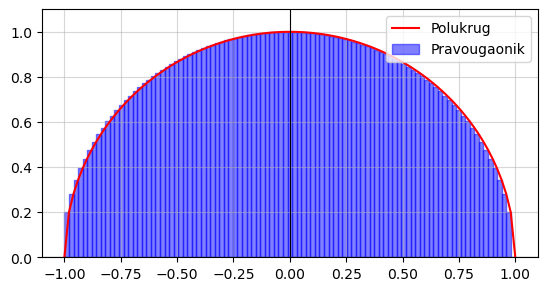

In [1364]:
plt.plot(x_vals, f_lambdified(x_vals), color="red", label="Polukrug")
plt.gca().set_aspect('equal')
plt.axhline(0, color='black', linewidth=0.8, linestyle='-') # x osa
plt.axvline(0, color='black', linewidth=0.8, linestyle='-') # y osa 
plt.xlim(-1.1, 1.1)
plt.ylim(0, 1.1)
plt.grid(alpha=0.5)

povrsina = 0
for i in range(0, len(x_vals)-1):
    x = x_vals[i+1] - x_vals[i]
    y = f_lambdified(x_vals[i+1])

    plt.fill_between([x_vals[i], x_vals[i+1]], 0, y, color='blue', alpha=0.5, label=("Pravougaonik"if(i==0)else ""))
    
    p = x*y
    povrsina+=p

print('Aproksimirana površina: ', povrsina, '\nPrava površina: ', (sym.pi/2).evalf())
plt.legend()
plt.show()


<b>Prikaz animacije: </b> <br><i>Fajl `animacija.gif` se mora nalaziti u istom folderu kao ova Jupyter sveska!</i>

![Animacija](animacija.gif "Animacija")

<b>Ovu animaciju i kod koji je generiše možete naći u priloženim fajlovima.</b>

---
<h4>Zadatak 2. - NumPy simboličko izračunavanje i SciPy procedure za numeričku integraciju</h4>
Naći rešenje integrala:
$$
\int_{2}^{3}{x^2}\,dx
\tag{2}
$$



Definisaćemo promenljive i podintegralnu funkciju:

In [1113]:
x = sym.Symbol("x")
f = x**2
f

Umesto "pešaka" da računamo integral, kao u prvom zadatku, koristimo proceduru `integrate` iz SymPy biblioteke kako bismo dobili rešenje:

In [1115]:
F = sym.integrate(f, (x, 2, 3))
F


---
<h5>SciPy biblioteka za integraciju</h5>

Metode za integraciju funkcija kada je funkcija data kao objekat:


\begin{aligned}
\text{quad} & \quad \text{-- Opšta metoda za numeričku integraciju.} \\
\text{dblquad} & \quad \text{-- Opšta metoda za dvostruku integraciju.} \\
\text{tplquad} & \quad \text{-- Opšta metoda za trostruku integraciju.} \\
\text{fixed\_quad} & \quad \text{-- Integracija pomoću Gaussove kvadrature reda } n. \\
\text{quadrature} & \quad \text{-- Integracija sa zadatom tolerancijom pomoću Gaussove kvadrature.} \\
\text{romberg} & \quad \text{-- Integracija pomoću Rombergove metode.}
\end{aligned}


Metode za integraciju funkcija kada su uzorci unapred dati:


\begin{aligned}
\text{trapezoid} & \quad \text{-- Korišćenje trapezoidnog pravila za računanje integrala.} \\
\text{cumulative\_trapezoid} & \quad \text{-- Korišćenje trapezoidnog pravila za kumulativni integral.} \\
\text{simpson} & \quad \text{-- Simpsonovo pravilo za računanje integrala iz uzoraka.} \\
\text{romb} & \quad \text{-- Rombergova metoda za integral iz } (2^k + 1) \text{ ravnomerno raspoređenih uzoraka.}
\end{aligned}

---


Sada ćemo odraditi <b>numerički</b> koristeći <b>SciPy</b> metode:
1. kvadraturnu,
2. trapeznu i
3. Simpsonovu formulu.

Koristimo integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1119]:
from scipy import integrate

Definišemo funkciju:

In [1121]:
def f(x):
  return x**2

Koristimo <b>kvadraturnu</b> formulu:

In [1123]:
val_quad, err_quad = integrate.quad(f, 2, 3)
print("Rezultat sa kvadraturnu:",val_quad)
print("Greška sa kvadraturnu:",err_quad)

Rezultat sa kvadraturnu: 6.333333333333334
Greška sa kvadraturnu: 7.031412489292659e-14


Pravimo vrednosti za tabeliranje:

In [1125]:
x_vals = np.linspace(2, 3, 100)
y_vals  = f(x_vals)

Primenjujemo <b>trapeznu</b> i <b>Simpsonovu</b> formulu:

In [1127]:
val_trap = integrate.trapezoid(y_vals,x_vals)
val_sim = integrate.simpson(y=y_vals,x=x_vals)
print("Rezultat sa trapeznu:",val_trap)
print("Rezultat sa Simpsonovu:",val_sim)

Rezultat sa trapeznu: 6.333350338400844
Rezultat sa Simpsonovu: 6.333333333333334


Tačnu vrednost smo simbolički izračunali:

In [1129]:
val_tacna = F.evalf()
val_tacna

<b>Apsolutna greška kvadraturne metode</b>

In [1131]:
abs(val_tacna - val_quad)

<b>Apsolutna greška trapezne metode</b>

In [1133]:
abs(val_tacna - val_trap)

<b>Apsolutna greška Simpsonove metode</b>

In [1135]:
abs(val_tacna - val_sim)

Sada ćemo napraviti grafik funkcije:

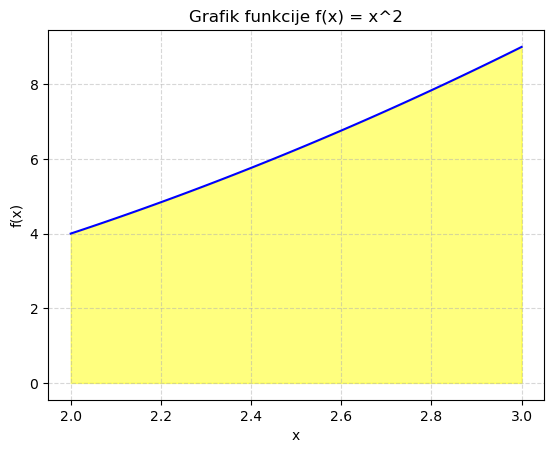

In [1137]:
plt.plot(x_vals, y_vals, color="blue")
plt.fill_between(x_vals, y_vals, alpha=0.5, color="yellow")
plt.title("Grafik funkcije f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

---
<h4>Zadatak 3. - Integral funkcije koja je definisana drugačije u različitim intervalima </h4>
Ako je f-ja f definisana sa:
$ f(x) = \left\{ \begin{array}{c1}
1-x & : \ 0 \leq x \leq 1 \\
x^2 & : \ 1< x \leq 0
\end{array} \right. $
, izračunati:

$$\int_{0}^{2}{f(x)}\,dx
\tag{3}
$$



Definisaćemo promenljive i podintegralnu funkciju:


In [1140]:
x = sym.Symbol("x")
f = sym.Piecewise(
    (1 - x, (x >= 0) & (x <= 1)),
    (x**2, (x > 1) & (x <= 2))
)
f

⎧1 - x  for x ≥ 0 ∧ x ≤ 1
⎪                        
⎨  2                     
⎪ x     for x ≤ 2 ∧ x > 1
⎩                        

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1142]:
F = sym.integrate(f, (x, 0, 2))
F

---
<h4>Zadatak 4. -  Integral inverzne trigonometrijske funkcije; Trapezna metoda ručno i preko procedure</h4>
Naći rešenje integrala:
$$
\int_{2}^{3}{\arcsin (\sqrt{\frac{x}{x+1}})}\,dx
\tag{4}
$$



Definisaćemo promenljive i podintegralnu funkciju:

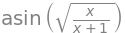

In [1145]:
x = sym.Symbol("x")
f = sym.asin (sym.sqrt(x/(x+1)))
f

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1147]:
F = sym.integrate(f, (x, 2, 3))
F

In [1148]:
F.evalf()

Sada ćemo iskoristiti <b>kompozitnu trapeznu</b> formulu:
$$
T(h) = \frac{h}{2}(f(a) + f(b) + 2\sum_{i=1}^{m-1}{f_i}) \tag{4.1}
$$
Gde je $h$ korak za tabeliranje funkcije.


Tabeliraćemo funkciju na 100 000 ekvidistantnih tačaka:

In [1151]:
n = 100000
a = 2
b = 3
h = (b-a)/n
f_lambdified = sym.lambdify(x, f, 'numpy') # Python izraz
x_vals = np.linspace(a, b, n) # tabeliranje po x
y_vals = f_lambdified(x_vals) # tabeliranje po y
print('h = ', h)

h =  1e-05


Primenićemo formulu $(4.1)$:

In [1153]:
F_trapz_procenjeno = (h/2)*(f_lambdified(a) + f_lambdified(b) + 2*sum(y_vals[1:n-1]))
F_trapz_procenjeno

A sad ćemo iskoristiti ugrađenu proceduru:

In [1155]:
F_trapz = integrate.trapezoid(y_vals, x_vals)
F_trapz

<b>Upoređivanje?</b>

In [1157]:
print("Apsolutna greška naše procene:", abs(F_trapz_procenjeno - F.evalf()))
print("Apsolutna greška procedure:", abs(F_trapz - F.evalf()))
print("Razlika između naše procene i ugrađene procedure:", abs(F_trapz - F_trapz_procenjeno))

Apsolutna greška naše procene: 1.00500314350604e-5
Apsolutna greška procedure: 3.80584452841504e-13
Razlika između naše procene i ugrađene procedure: 1.0050031054475994e-05


---
<h4>Zadatak 5. - Integral kombinacija logaritma i trigonometrije; Numeričko izračunavanje</h4>
Naći rešenje integrala:
$$
\int_{-1/2}^{1/2}{ \cos x \ln \frac{1+x}{1-x}}\,dx
\tag{5}
$$



Definisaćemo promenljive i podintegralnu funkciju:

In [1160]:
x = sym.Symbol("x")
f = sym.cos(x)*sym.ln((x+1)/(1-x))
f

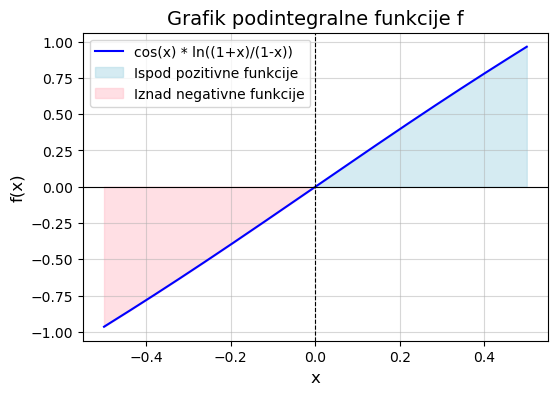

In [1161]:
x_vals = np.linspace(-0.5, 0.5, 500) 
f_lambdified = sym.lambdify(x, f, 'numpy') 
y_vals = f_lambdified(x_vals) 

# kreiramo grafik
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='cos(x) * ln((1+x)/(1-x))', color='blue')

plt.fill_between(x_vals, f_lambdified(x_vals), where=(y_vals > 0), color='lightblue', alpha=0.5, label='Ispod pozitivne funkcije')
plt.fill_between(x_vals, y_vals, where=(y_vals < 0), color='pink', alpha=0.5, label='Iznad negativne funkcije')

# dodavanje naslova i oznaka
plt.title('Grafik podintegralne funkcije f', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-') # x osa je puna linija
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # y osa je isprekidana linija
plt.legend(fontsize=10) # prikaz legende
plt.grid(alpha=0.5) # prikaz pozadine na kvadratiće i njihova prozirnost

plt.show()

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

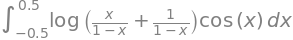

In [1163]:
F = sym.integrate(f, (x, -0.5, 0.5))
F

Pošto SymPy ne zna simbolički da reši integral, probaćemo numerički:
<h5>MpMath i SymPy</h5>

In [1165]:
import mpmath as mp # mpmath za proizvoljnu preciznost, veću od floating point
mp.mp.dps = 50 # 50 decimalnih vrednosti

f_mpmath = sym.lambdify(x, f, 'mpmath')
# mpmath.quad kvadraturna formula za numeričko izračunavanje određenog integrala
val = sym.sympify(mp.quad(f_mpmath, (-0.5, 0.5))) # kvadraturna formula i pretvaranje rezultata u sympy izraz
val

Znači, vrednost integrala je 0. Što se i očekivalo sa grafika podintegralne funkcije.

<h5>SciPy i NumPy</h5>

In [1168]:
# from scipy import integrate # modul za numeričku integraciju
f_scipy = lambda t: np.cos(t)*np.log((t+1)/(1-t))

val, err = integrate.quad(f_scipy, -0.5, 0.5) # kvadraturna formula
val

---
<h4>Zadatak 6. - Nesvojstveni integral gde interval integracije nije konačan; Simboličko i numeričko rešenje</h4>
Naći rešenje integrala:
$$
\int_{1}^{∞}{\frac{dx}{x(x+1)}}\,
\tag{6}
$$



Definisaćemo promenljive i podintegralnu funkciju:

In [1171]:
x = sym.Symbol("x")
f = 1/(x*(x+1))
f

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1173]:
F = sym.integrate(f, (x, 1, sym.oo))
F

Sada ćemo odraditi i <b>numeričko</b> rešenje: definišemo funkciju pa koristeći <b>kvadraturnu</b> formulu dolazimo do rešenja:


In [1175]:
def f(x):
  return 1/(x*(x+1))

In [1176]:
val, err = integrate.quad(f, 1, np.inf)
print("Rezultat sa kvadraturnu:",val)
print("Greška sa kvadraturnu:",err)

Rezultat sa kvadraturnu: 0.6931471805599454
Greška sa kvadraturnu: 7.273556512042173e-13


<b>Apsolutna greška kvadraturne metode</b>

In [1178]:
abs(F.evalf()-val)

---
<h4>Zadatak 7. - Nesvojstveni integral gde podintegralna funkcija nije ograničena na datom intervalu</h4>
Naći rešenje integrala:
$$
\int_{0}^{1}{\frac{dx}{\sqrt{x}}}\,
\tag{7}
$$



Definisaćemo promenljive i podintegralnu funkciju:

In [1181]:
x = sym.Symbol("x")
f = 1/(sym.sqrt(x))
f

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1183]:
F = sym.integrate(f, (x, 0, 1))
F

## 2.3 Primena integrala Zadaci

---
<h4>Zadatak 1. - Površina ravne figure</h4>
Izračunati veličinu površine koja ograničava kriva $y= \ln x $ i prave $x = \frac{1}{2}$ i $x=2$.



Formula koja se koristi za računanje površine ravne figure je: $P = \int _{a}^{b}(f(x)-g(x))\,dx $.

Ako je situacija da y osa razdvaja dve površine onda se koristi: $P = P_1 + P_2 = \int _{a}^{c}(f(x)-0)\,dx + \int _{c}^{b}(0-f(x))\,dx $ pri čemu je deo od $a$ do $c$ pozitivan, a deo od $c$ do $b$ negativan.

Takođe se ovo  može zapisati pomoću apsolutne vrednosti:
$P = \int _{a}^{b} |f(x)| \,dx $

Na osnovu grafika vidimo da se površina deli na 2 dela i da u tački $(0,1)$ se menja pa integral delimo na 2 dela:



$P = P_1 + P_2 = \int _{\frac{1}{2}}^{1}(0-lnx)\,dx + \int _{1}^{2}(lnx-0)\,dx = -\int _{\frac{1}{2}}^{1}lnx\,dx + \int _{1}^{2}lnx\,dx  $





Definisaćemo promenljive i podintegralnu funkciju:

In [1189]:
x = sym.Symbol("x")
f = sym.ln(x)
f

Grafik:

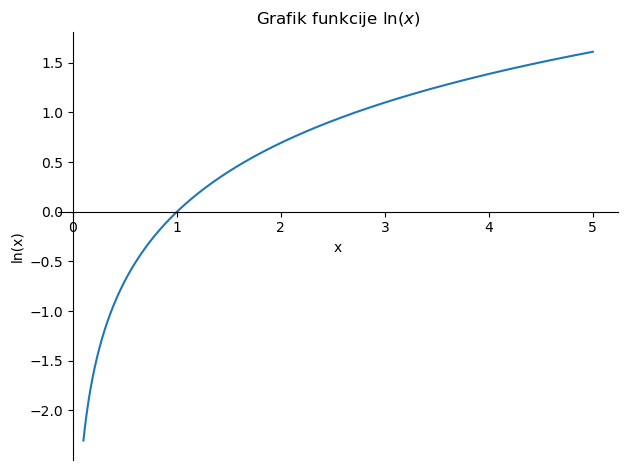

In [1191]:
sym.plot(f, (x, 0.1, 5), title=r"Grafik funkcije $\ln(x)$", xlabel="x", ylabel="ln(x)")

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1193]:
F = - sym.integrate(f, (x, 0.5, 1)) + sym.integrate(f, (x, 1, 2))
F

In [1194]:
F.evalf()

---
<h4>Zadatak 2. - Površina i zapremina obrtnog tela</h4>
Izračunati veličinu zapremine tela koja nastaje rotacijom kruga $x^2+(y-4)^2 = 9 $ oko x-ose.





Formula koja se koristi za računanje zapremine rotacionog tela je: $V= \pi \int _{a}^{b}(f(x))^2\,dx $

Formula koja se koristi za računanje površine rotacionog tela je: $P = 2\pi \int _{a}^{b}(f(x) \sqrt{1+(f'(x))^2})\,dx $

Iz $x^2+(y-4)^2 = 9 $ dobijamo $ y -4 = \pm \sqrt{9-x^2} $

Odnosno imamo 2 jednačine za y:

$y  = 4 +  \sqrt{9-x^2} $  (jednačina gornjeg polukruga)

$y  = 4 -  \sqrt{9-x^2} $ (jednačina donjeg polukruga)

$ V = V_1 - V_2 = \pi \int _{-3}^{3}(4 + \sqrt{9-x^2})^2\,dx - \pi \int _{-3}^{3}(4 - \sqrt{9-x^2})^2\,dx =
\pi \int _{-3}^{3}((4 + \sqrt{9-x^2})^2 - (4 - \sqrt{9-x^2})^2) \,dx $

Definisaćemo simbole i rešićemo jednačinu:

In [1200]:
x, y = sym.symbols("x y")
y12 = sym.solve(x**2 + (y-4)**2 - 9, y)
y12

Definisaćemo podintegralnu funkciju:

In [1202]:
f = sym.pi*((y12[1])**2-(y12[0])**2)
f

Koristimo proceduru integrate iz SymPy biblioteke kako bismo dobili rešenje:

In [1204]:
F =  sym.integrate(f, (x, -3, 3))
F

---
<h4>Zadatak 3. - Površina i zapremina sfere (obrtnog tela) </h4>
Izračunati veličinu površine i zapremine sfere sa centrom u koordinatnom početku poluprečnika $R$.





Sfera nastaje rotacijom polukruga $x^2+y^2 = R^2, y>0 $, oko x-ose pa dobijamo jednačinu polukruga: $y = \sqrt{R^2-x^2}  $ .  

Prvo treba da odredimo izvod ove funkcije $\sqrt{R^2-x^2}$ po $x$ jer nam je neophodan kako bi odredili površinu.

Definisaćemo simbole i rešićemo jednačinu:

In [1209]:
x = sym.Symbol("x")
y = sym.Symbol("y", positive=True)
R = sym.Symbol("R", positive=True)
y12 = sym.solve(x**2+y**2-R**2, y)
y12

Definisaćemo podintegralnu funkciju, odbacujemo negativno rešenje jednačine:

In [1211]:
f = y12[1]
f

Ordeđujemo izvod:

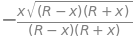

In [1213]:
g = sym.diff(f, x)
g

Površinu ćemo računati kao: $P = 2\pi \int _{-R}^{R}(f(x) \sqrt{1+(g(x))^2})\,dx $

Pa za površinu dobijamo:

In [1216]:
P = sym.integrate(2*sym.pi*(f*sym.sqrt(1+(g**2))),(x,-R,R))
P

 $V= \pi \int _{-R}^{R}(f(x))^2\,dx $

Pa za zapreminu dobijamo:

In [1219]:
V = sym.integrate(sym.pi*f**2,(x,-R,R))
V

---
<h4>Zadatak 4. - Dužina luka krive</h4>
Odrediti dužinu luka krive $y = \ln (1-x^2)$ na intervalu $0 \leq x \leq \frac {1} {2}. $





Formula koja se koristi za računanje dužina luka krive: $L = \int_{a}^{b} \sqrt{1+(f'(x))^2}\,dx $

Definisaćemo promenljivu, funkciju i ordeđujemo izvod:

In [1223]:
x = sym.Symbol("x", positive=True)
f = sym.ln(1-x**2)
g = sym.diff(f,x)
g

Pa za dužinu luka krive dobijamo:

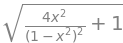

In [1225]:
f = sym.sqrt(1+(g**2))
f

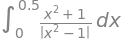

In [1226]:
L = sym.integrate(f, (x, 0, 0.5))
L

Moramo srediti izraz jer SymPy ne može da ga izračuna.

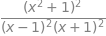

In [1228]:
(g**2+1).factor()

In [1229]:
sym.sqrt((g**2+1).factor())

In [1230]:
L = sym.integrate(sym.sqrt((g**2+1).factor()) , (x, 0, 0.5))
L

# 2.4 Zadaci dvojni i trojni određeni integrali

---
<h4>Zadatak 1. - Dvojni integral i numeričko rešenje koristeći SciPy</h4>
Naći rešenje dvojnog integrala:
$$
I =  \int_{0}^ {\pi}\sin (x)  \,dx \int_{0}^{1}\, y^2\, dy
\tag{1}
$$


Definišemo simbole i funkciju:

In [1234]:
y, x = sym.symbols("y x")

In [1235]:
f = sym.sin(x) * y**2
f

Integralimo i dobijamo rešenje:

In [1237]:
F = sym.integrate(f, (x, 0, sym.pi), (y, 0, 1))
F.evalf()

Sada ćemo koristeći proceduru `dblquad` iz biblioteke SciPy <b>numerički</b> rešiti ovaj integral.  

In [1239]:
f = lambda y, x: np.sin(x) * y**2
F_dblquad, dblquad_err = integrate.dblquad(f,  0, np.pi, 0, 1)
F_dblquad

Greška integracije je:

In [1241]:
dblquad_err

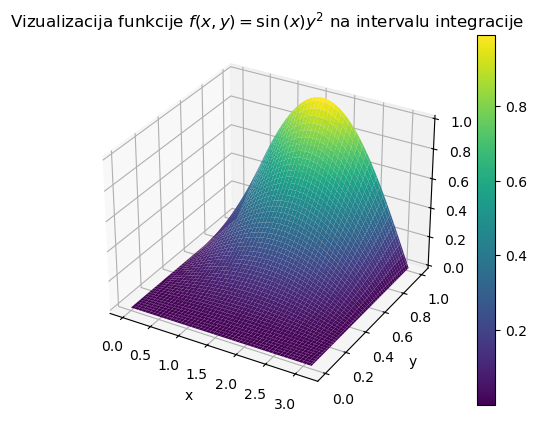

In [1372]:
from mpl_toolkits.mplot3d import Axes3D

# Definiši funkciju
def fja(x, y):
    return np.sin(x)* y**2

# Oblast u x i y
x = np.linspace(0, np.pi, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = fja(X, Y)

# Crtanje 3D grafika
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title(r"Vizualizacija funkcije $f(x, y) = \sin{(x)}y^2$ na intervalu integracije")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

fig.colorbar(surface, ax=ax)



# Prikaz oblasti
plt.show()


---
<h4>Zadatak 2. - Trojni integral i numeričko rešenje koristeći SciPy</h4>
Naći rešenje trojnog integrala:
$$
I = \int_{0}^{2\pi} dx  \int_{0}^{1}\, y^2 \, dy  \int_{0}^{1} \, dz
\tag{2}
$$


Definišemo simbole i funkciju:

In [1245]:
y, x, z = sym.symbols("y x z")

In [1246]:
f = y**2
f

Radimo trostruki integral i dobijamo rešenje:

In [1248]:
F = sym.integrate(f , (z, 0, 1), (y, 0, 1), (x, 0, 2 * sym.pi))
F.evalf()

Sada ćemo koristeći proceduru `tplquad` iz biblioteke SciPy <b>numerički</b> rešiti ovaj integral.  

In [1250]:
f = lambda x, y, z: y**2
F_tplquad, tplquad_err = integrate.tplquad(f, 0, 1, 0, 1, 0, 2*np.pi)
F_tplquad

Greška integracije je:

In [1252]:
tplquad_err

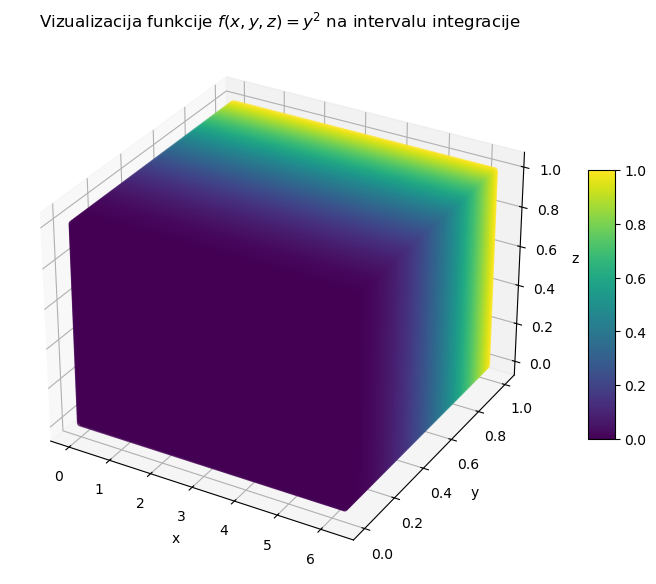

In [1253]:
# Definišemo funkciju iz integrala: 1 * y^2 * 1 = y^2
def f_3d(x, y, z):
    return y**2

# Oblasti za x, y, z
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 1, 100)
z = np.linspace(0, 1, 100)

X, Y, Z = np.meshgrid(x, y, z)
F = f_3d(X, Y, Z)

# Vizualizacija funkcije u 3D prostoru
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Površinski graf
surf = ax.scatter(X, Y, Z, c=F, cmap='viridis')
ax.set_title("Vizualizacija funkcije $f(x, y, z) = y^2$ na intervalu integracije")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Dodajemo bočnu traku sa bojama
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


---
<h4>Zadatak 3. - Dvojni integral sa parametrom </h4>
Naći rešenje dvojnog integrala:
$$
I = \int_{x=0}^{\pi}\int_{y=cos(a)}^{e^{-a}}{xsiny}\,dx \,dy
\tag{3}
$$

Rešava se standradno:

In [1256]:
x, y, a = sym.symbols("x y a")
f = x*sym.sin(y)
f

In [1257]:
F = f.integrate((x, 0, sym.pi), (y, sym.cos(a), sym.exp(-a)))
F

---
---
# Literatura


1. Nataša Ćirović, Numerička matematika, Beograd, 2018. <br>
2. [SciPy Dokumentacija](https://scipy.org/), pristupljeno novembra 2024. <br>
3. [Materijali sa Matematike 2 - Teams platforma](https://teams.microsoft.com/l/team/19%3aDjLrqQwsTgXsR3C_O6krlv59mS4kiaRPZzxbIUSNTIo1%40thread.tacv2/conversations?groupId=0e44125a-5fa8-4631-8d14-b1ddcf5e2a1b&tenantId=1774ef2e-9c62-478a-8d3a-fd2a495547ba), pristupljeno novembra 2024.  <br>
4. [Materijali sa Matematike 3](http://matematika3.etf.rs/testovi/testovi%20M3.pdf), pristupljeno novembra 2024. <br>
5. [Matplotlib Dokumentacija](https://matplotlib.org/), pristupljeno novembra 2024.

